In [26]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import itertools
import random

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import euclidean

# set working directory
os.chdir("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth")

# set style
#sns.set_style("white")

1
1


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_12879/2104477232.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


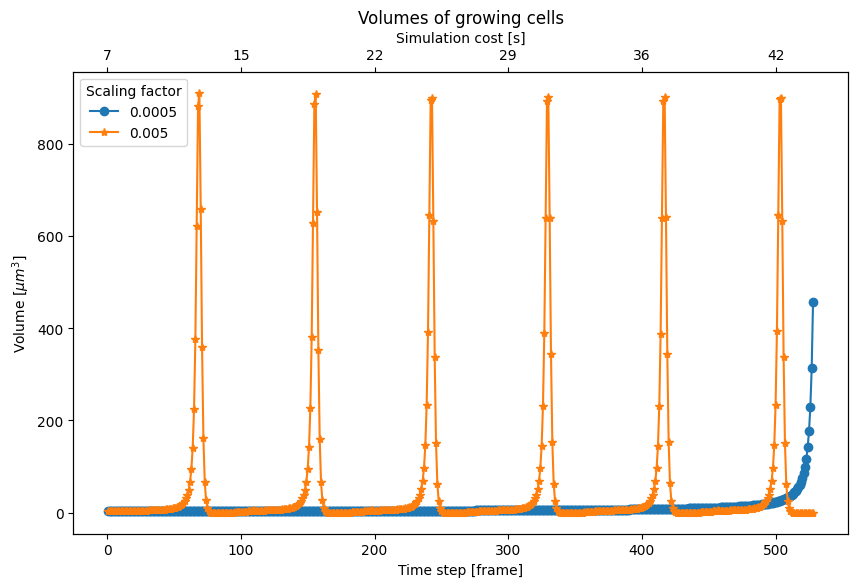

In [53]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_times.json", 'r') as f1:
    times1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_s0.005_volumes.json", 'r') as f1:
    volumes2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_s0.005_times.json", 'r') as f1:
    times2 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_2xvolume_1-530/20240109_growth_2xvolume_s0.005_frame_cells.json", 'r') as f1:
    frames2 = json.load(f1)
    
# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

scaling_factors = [0.0005, 0.005, 0.05, 0.5]

count = 0
for cell_name, volumes in volumes1.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, '-o', label=scaling_factors[0])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes2.items():
    frames = frames2[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, '-*', label=scaling_factors[1])
    count += 1

print(count)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::82]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
#ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title('Volumes of growing cells')
ax1.legend(title='Scaling factor')  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
plt.savefig("20240109_growth_2xvolume.png", transparent=False, dpi=500)

plt.show()

1
1
1


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_12879/4042897072.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


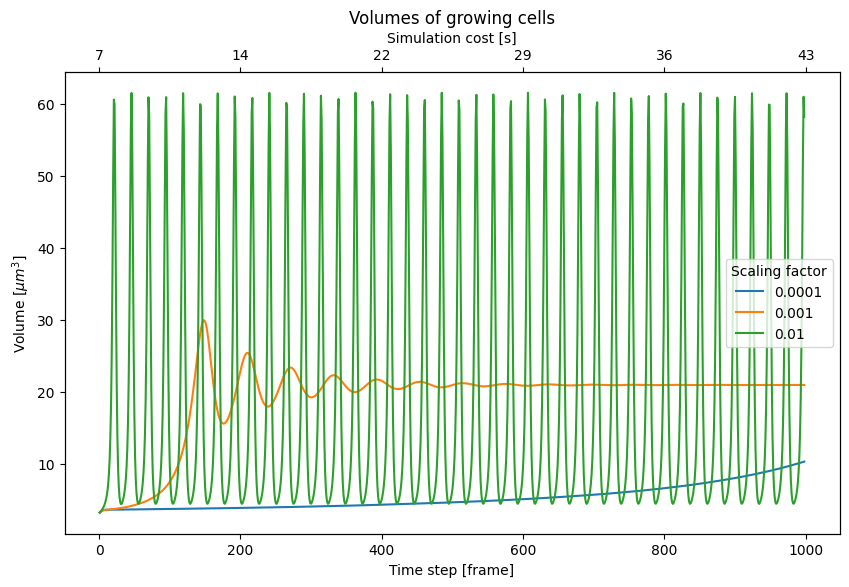

In [59]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.0001_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.0001_times.json", 'r') as f1:
    times1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.0001_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.001_volumes.json", 'r') as f1:
    volumes2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.001_times.json", 'r') as f1:
    times2 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.001_frame_cells.json", 'r') as f1:
    frames2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.01_volumes.json", 'r') as f1:
    volumes3 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.01_times.json", 'r') as f1:
    times3 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240109_growth_5xvolume/20240109_growth_5xvolume_s0.01_frame_cells.json", 'r') as f1:
    frames3 = json.load(f1)


import matplotlib.pyplot as plt

# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

scaling_factors = [0.0001, 0.001, 0.01]

count = 0
for cell_name, volumes in volumes1.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[0])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes2.items():
    frames = frames2[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[1])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes3.items():
    frames = frames3[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[2])
    count += 1

print(count)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::82]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
#ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title('Volumes of growing cells')
ax1.legend(title='Scaling factor')  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
plt.savefig("20240109_growth_5xvolume.png", transparent=False, dpi=500)

plt.show()

1
1
1
1
1


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_73287/3004485742.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


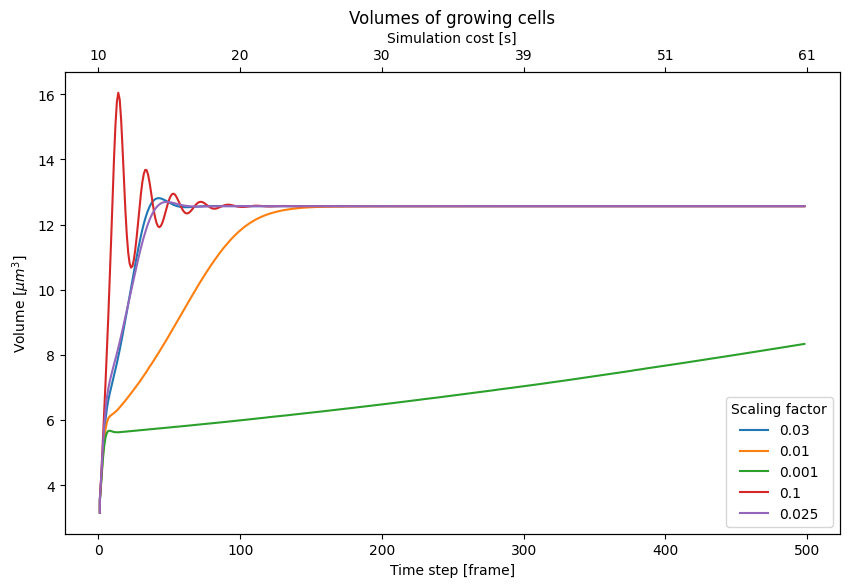

In [30]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.03_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.03_times.json", 'r') as f1:
    times1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.03_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.03_pressures.json", 'r') as f1:
    pressures1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.01_volumes.json", 'r') as f1:
    volumes2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.01_times.json", 'r') as f1:
    times2 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.01_frame_cells.json", 'r') as f1:
    frames2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.01_pressures.json", 'r') as f1:
    pressures2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.001_volumes.json", 'r') as f1:
    volumes3 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.001_times.json", 'r') as f1:
    times3 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.001_frame_cells.json", 'r') as f1:
    frames3 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.001_pressures.json", 'r') as f1:
    pressures3 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.1_volumes.json", 'r') as f1:
    volumes4 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.1_times.json", 'r') as f1:
    times4 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.1_frame_cells.json", 'r') as f1:
    frames4 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.1_pressures.json", 'r') as f1:
    pressures4 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.025_volumes.json", 'r') as f1:
    volumes5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.025_times.json", 'r') as f1:
    times5 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.025_frame_cells.json", 'r') as f1:
    frames5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_50pressurescale/20240116_growth_3xvolume_50pressurescale_s0.025_pressures.json", 'r') as f1:
    pressures5 = json.load(f1)


import matplotlib.pyplot as plt

# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

scaling_factors = [0.03, 0.01, 0.001, 0.1, 0.025]

count = 0
for cell_name, volumes in volumes1.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[0])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes2.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[1])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes3.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[2])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes4.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[3])
    count += 1

print(count)

count = 0
for cell_name, volumes in volumes5.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[4])
    count += 1

print(count)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::82]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
#ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title('Volumes of growing cells')
ax1.legend(title='Scaling factor')  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
# plt.savefig("20240109_growth_5xvolume.png", transparent=False, dpi=500)

plt.show()

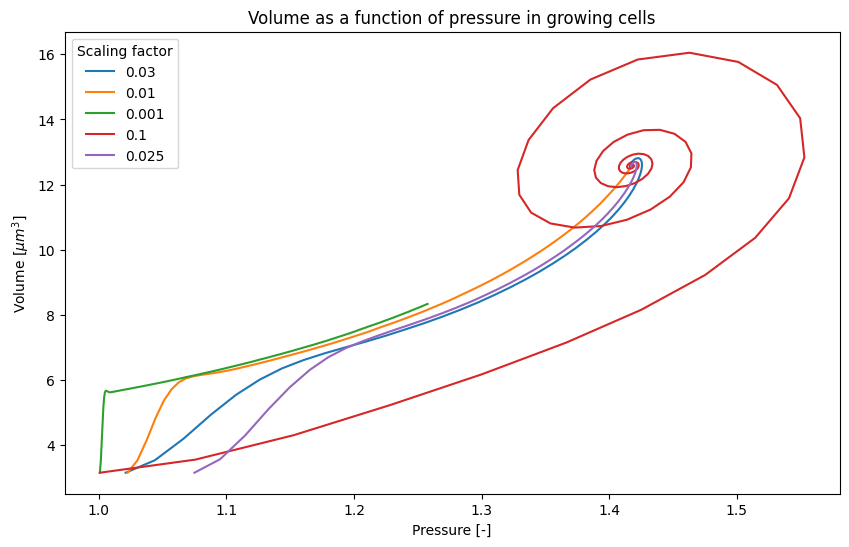

In [32]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

for cell_name, volumes in volumes1.items():
    pressures = pressures1[cell_name]
    ax1.plot(pressures, volumes, label=scaling_factors[0])
    count += 1

for cell_name, volumes in volumes2.items():
    pressures = pressures2[cell_name]
    ax1.plot(pressures, volumes, label=scaling_factors[1])
    count += 1

for cell_name, volumes in volumes3.items():
    pressures = pressures3[cell_name]
    ax1.plot(pressures, volumes, label=scaling_factors[2])
    count += 1

for cell_name, volumes in volumes4.items():
    pressures = pressures4[cell_name]
    ax1.plot(pressures, volumes, label=scaling_factors[3])
    count += 1

for cell_name, volumes in volumes5.items():
    pressures = pressures5[cell_name]
    ax1.plot(pressures, volumes, label=scaling_factors[4])
    count += 1

ax1.set_xlabel('Pressure [-]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')

ax1.set_title('Volume as a function of pressure in growing cells')
ax1.legend(title='Scaling factor')  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
# plt.savefig("20240109_growth_5xvolume.png", transparent=False, dpi=500)

plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_73287/1656750813.py:221: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


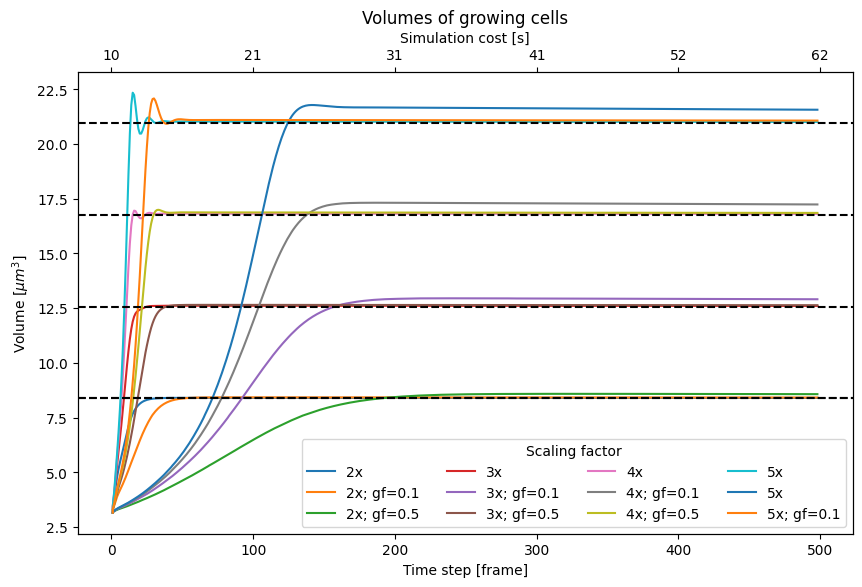

In [59]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_PIDpressure_volumes.json", 'r') as f1:
    volumes3x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_PIDpressure_times.json", 'r') as f1:
    times3x = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_PIDpressure_frame_cells.json", 'r') as f1:
    frames3x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_PIDpressure_pressures.json", 'r') as f1:
    pressures3x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_scaled0.1_PIDpressure_volumes.json", 'r') as f1:
    volumes3x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_scaled0.1_PIDpressure_times.json", 'r') as f1:
    times3x_scaled0_1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_scaled0.1_PIDpressure_frame_cells.json", 'r') as f1:
    frames3x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_scaled0.1_PIDpressure_pressures.json", 'r') as f1:
    pressures3x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_scaled0.5_PIDpressure_volumes.json", 'r') as f1:
    volumes3x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_scaled0.5_PIDpressure_times.json", 'r') as f1:
    times3x_scaled0_5 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_scaled0.5_PIDpressure_frame_cells.json", 'r') as f1:
    frames3x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_3xvolume_scaled0.5_PIDpressure_pressures.json", 'r') as f1:
    pressures3x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_PIDpressure_volumes.json", 'r') as f1:
    volumes2x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_PIDpressure_times.json", 'r') as f1:
    times2x = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_PIDpressure_frame_cells.json", 'r') as f1:
    frames2x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_PIDpressure_pressures.json", 'r') as f1:
    pressures2x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_scaled0.5_PIDpressure_volumes.json", 'r') as f1:
    volumes2x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_scaled0.5_PIDpressure_times.json", 'r') as f1:
    times2x_scaled0_5 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_scaled0.5_PIDpressure_frame_cells.json", 'r') as f1:
    frames2x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_scaled0.5_PIDpressure_pressures.json", 'r') as f1:
    pressures2x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_scaled0.1_PIDpressure_volumes.json", 'r') as f1:
    volumes2x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_scaled0.1_PIDpressure_times.json", 'r') as f1:
    times2x_scaled0_1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_scaled0.1_PIDpressure_frame_cells.json", 'r') as f1:
    frames2x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_2xvolume_scaled0.1_PIDpressure_pressures.json", 'r') as f1:
    pressures2x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_PIDpressure_volumes.json", 'r') as f1:
    volumes4x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_PIDpressure_times.json", 'r') as f1:
    times4x = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_PIDpressure_frame_cells.json", 'r') as f1:
    frames4x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_PIDpressure_pressures.json", 'r') as f1:
    pressures4x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_scaled0.1_PIDpressure_volumes.json", 'r') as f1:
    volumes4x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_scaled0.1_PIDpressure_times.json", 'r') as f1:
    times4x_scaled0_1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_scaled0.1_PIDpressure_frame_cells.json", 'r') as f1:
    frames4x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_scaled0.1_PIDpressure_pressures.json", 'r') as f1:
    pressures4x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_scaled0.5_PIDpressure_volumes.json", 'r') as f1:
    volumes4x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_scaled0.5_PIDpressure_times.json", 'r') as f1:
    times4x_scaled0_5 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_scaled0.5_PIDpressure_frame_cells.json", 'r') as f1:
    frames4x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_4xvolume_scaled0.5_PIDpressure_pressures.json", 'r') as f1:
    pressures4x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_PIDpressure_volumes.json", 'r') as f1:
    volumes5x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_PIDpressure_times.json", 'r') as f1:
    times5x = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_PIDpressure_frame_cells.json", 'r') as f1:
    frames5x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_PIDpressure_pressures.json", 'r') as f1:
    pressures5x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_scaled0.1_PIDpressure_volumes.json", 'r') as f1:
    volumes5x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_scaled0.1_PIDpressure_times.json", 'r') as f1:
    times5x_scaled0_1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_scaled0.1_PIDpressure_frame_cells.json", 'r') as f1:
    frames5x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_scaled0.1_PIDpressure_pressures.json", 'r') as f1:
    pressures5x_scaled0_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_scaled0.5_PIDpressure_volumes.json", 'r') as f1:
    volumes5x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_scaled0.5_PIDpressure_times.json", 'r') as f1:
    times5x_scaled0_5 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_scaled0.5_PIDpressure_frame_cells.json", 'r') as f1:
    frames5x_scaled0_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240116_growth_3xvolume_PIDpressure/20240116_growth_5xvolume_scaled0.5_PIDpressure_pressures.json", 'r') as f1:
    pressures5x_scaled0_5 = json.load(f1)

# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

scaling_factors = ['2x', '2x; gf=0.1', '2x; gf=0.5', 
                   '3x', '3x; gf=0.1', '3x; gf=0.5', 
                   '4x', '4x; gf=0.1', '4x; gf=0.5',
                   '5x', '5x; gf=0.1', '5x; gf=0.5',]

for cell_name, volumes in volumes2x.items():
    frames = frames2x[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[0])

for cell_name, volumes in volumes2x_scaled0_5.items():
    frames = frames2x_scaled0_5[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[1])

for cell_name, volumes in volumes2x_scaled0_1.items():
    frames = frames2x_scaled0_1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[2])



for cell_name, volumes in volumes3x.items():
    frames = frames3x[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[3])

for cell_name, volumes in volumes3x_scaled0_1.items():
    frames = frames3x_scaled0_1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[4])

for cell_name, volumes in volumes3x_scaled0_5.items():
    frames = frames3x_scaled0_5[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[5])



for cell_name, volumes in volumes4x.items():
    frames = frames4x[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[6])

for cell_name, volumes in volumes4x_scaled0_1.items():
    frames = frames4x_scaled0_1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[7])

for cell_name, volumes in volumes4x_scaled0_5.items():
    frames = frames4x_scaled0_5[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[8])



for cell_name, volumes in volumes5x.items():
    frames = frames5x[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[9])

for cell_name, volumes in volumes5x_scaled0_1.items():
    frames = frames5x_scaled0_1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[9])

for cell_name, volumes in volumes5x_scaled0_5.items():
    frames = frames5x_scaled0_5[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[10])

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times2x_scaled0_1.keys())[::82]  # Select keys at regular intervals
values = [times2x_scaled0_1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
#ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

# Add horizontal lines
ax1.axhline(y=8.37758, color='black', linestyle='--')
ax1.axhline(y=(8.37758/2)*2, color='black', linestyle='--')
ax1.axhline(y=(8.37758/2)*3, color='black', linestyle='--')
ax1.axhline(y=(8.37758/2)*4, color='black', linestyle='--')
ax1.axhline(y=(8.37758/2)*5, color='black', linestyle='--')

ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title('Volumes of growing cells')
ax1.legend(title='Scaling factor', loc='lower right', ncol=4)  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
plt.savefig("2024016_growth_DIPgrowth.png", transparent=False, dpi=500)

plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_73287/4073191306.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


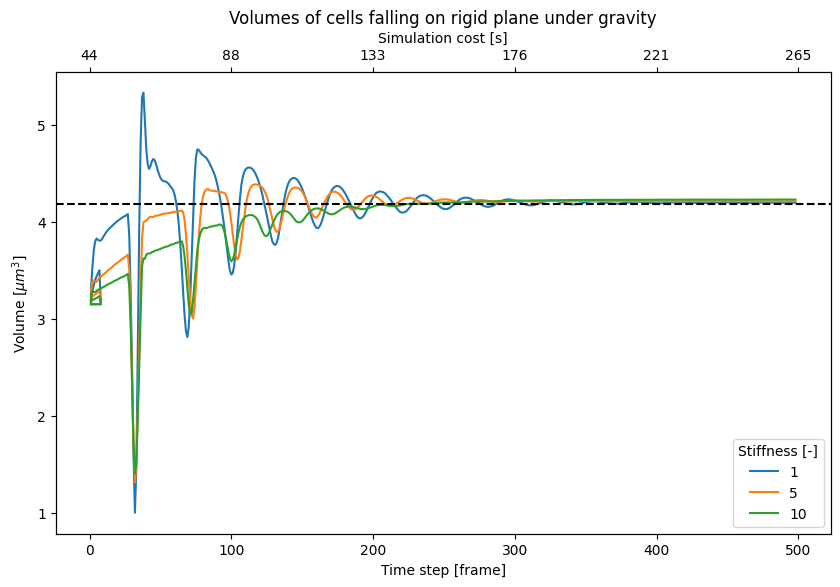

In [73]:
# compression of volume due to mechanical stresses

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/3D-physics/compression/20240117_compression_gravity/20240117_compression_gravity_volumes.json", 'r') as f1:
    volumes1x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/3D-physics/compression/20240117_compression_gravity/20240117_compression_gravity_times.json", 'r') as f1:
    times1x = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/3D-physics/compression/20240117_compression_gravity/20240117_compression_gravity_frame_cells.json", 'r') as f1:
    frames1x = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/3D-physics/compression/20240117_compression_gravity/20240117_compression_gravity_pressures.json", 'r') as f1:
    pressures1x = json.load(f1)

    
# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

stiffness = ['1', '5', '10']

for index, (cell_name, volumes) in enumerate(volumes1x.items()):
    frames = frames1x[cell_name]
    
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    label = stiffness[index]
    ax1.plot(frames, volumes, label=label)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1x.keys())[::82]  # Select keys at regular intervals
values = [times1x[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

# Add horizontal lines
ax1.axhline(y=8.37758/2, color='black', linestyle='--')

ax2.set_xlabel('simulation cost [s]')

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title('Volumes of cells falling on rigid plane under gravity')
ax1.legend(title='Stiffness [-]', loc='lower right', ncol=1)  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
plt.savefig("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/3D-physics/compression/20240117_compression_gravity/2024017_compression_gravity.png", transparent=False, dpi=500)

plt.show()

1.025192418020094
0.960296675815444


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_99912/2028449670.py:162: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


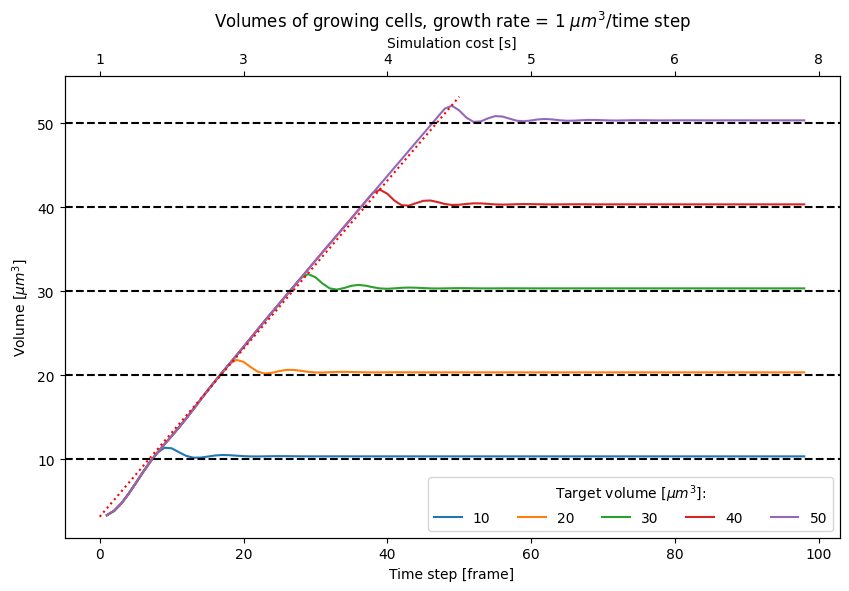

In [20]:
# PID controlled linear growth; single cell iterations

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target10_gf1_PID_volumes.json", 'r') as f1:
    volumes10 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target10_gf1_PID_times.json", 'r') as f1:
    times10 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target10_gf1_PID_frame_cells.json", 'r') as f1:
    frames10 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target10_gf1_PID_pressures.json", 'r') as f1:
    pressures10 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target20_gf1_PID_volumes.json", 'r') as f1:
    volumes20 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target20_gf1_PID_times.json", 'r') as f1:
    times20 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target20_gf1_PID_frame_cells.json", 'r') as f1:
    frames20 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target20_gf1_PID_pressures.json", 'r') as f1:
    pressures20 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target30_gf1_PID_volumes.json", 'r') as f1:
    volumes30 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target30_gf1_PID_times.json", 'r') as f1:
    times30 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target30_gf1_PID_frame_cells.json", 'r') as f1:
    frames30 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target30_gf1_PID_pressures.json", 'r') as f1:
    pressures30 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target40_gf1_PID_volumes.json", 'r') as f1:
    volumes40 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target40_gf1_PID_times.json", 'r') as f1:
    times40 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target40_gf1_PID_frame_cells.json", 'r') as f1:
    frames40 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target40_gf1_PID_pressures.json", 'r') as f1:
    pressures40 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target50_gf1_PID_volumes.json", 'r') as f1:
    volumes50 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target50_gf1_PID_times.json", 'r') as f1:
    times50 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target50_gf1_PID_frame_cells.json", 'r') as f1:
    frames50 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target50_gf1_PID_pressures.json", 'r') as f1:
    pressures50 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target500_gf1_PID_volumes.json", 'r') as f1:
    volumes500 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target500_gf1_PID_times.json", 'r') as f1:
    times500 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target500_gf1_PID_frame_cells.json", 'r') as f1:
    frames500 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_lineargrowth_PID/20240123_lineargrowth_target500_gf1_PID_pressures.json", 'r') as f1:
    pressures500 = json.load(f1)


# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

scaling_factors = ['10', '20', '30', 
                   '40', '50', '500']

for cell_name, volumes in volumes10.items():
    frames = frames10[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[0])

for cell_name, volumes in volumes20.items():
    frames = frames20[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[1])

for cell_name, volumes in volumes30.items():
    frames = frames30[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[2])

for cell_name, volumes in volumes40.items():
    frames = frames10[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[3])

average_slopes_y50 = []  # List to store average slopes for each cell
average_slopes_x50 = []  # List to store average slopes for each cell

for cell_name, volumes in volumes50.items():
    frames = frames10[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[4])

    # Find the x-value at which the curve reaches y = 50
    index_at_y_50 = np.argmax(np.array(volumes) >= 50)
    
    # Calculate the slope
    if len(frames) > 1 and index_at_y_50 > 0:
        # Calculate the slope using numpy's gradient function
        slopes = np.gradient(volumes) / np.gradient(frames)
        
        # Calculate the average slope until x-value where y = 50
        average_slope = np.mean(slopes[:index_at_y_50])
        average_slopes_y50.append(average_slope)

    # Calculate the slope
    if len(frames) > 1:
        # Calculate the slope using numpy's gradient function
        slopes = np.gradient(volumes) / np.gradient(frames)
        
        # Calculate the average slope until frames = 50
        average_slope = np.mean(slopes[:50])
        average_slopes_x50.append(average_slope)

# Calculate the overall average slope
overall_average_slopey50 = np.mean(average_slopes_y50)

# Calculate the overall average slope
overall_average_slopex50 = np.mean(average_slopes_x50)
print(overall_average_slopey50)
print(overall_average_slopex50)

'''for cell_name, volumes in volumes500.items():
    frames = frames10[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[5])'''

# Plotting the line on the same graph
x_line = np.linspace(0, 50, 100)  # Adjust the number of points as needed
y_line = x_line + 3.153

ax1.plot(x_line, y_line, linestyle=':', color='red')


# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times10.keys())[::15]  # Select keys at regular intervals
values = [times10[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
#ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

# Add horizontal lines
ax1.axhline(y=10, color='black', linestyle='--')
ax1.axhline(y=20, color='black', linestyle='--')
ax1.axhline(y=30, color='black', linestyle='--')
ax1.axhline(y=40, color='black', linestyle='--')
ax1.axhline(y=50, color='black', linestyle='--')

ax2.set_xlabel('simulation cost [s]')

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title(r'Volumes of growing cells, growth rate = 1 $\mu m^3$/time step')
ax1.legend(title=r'Target volume [$\mu m^3$]:', loc='lower right', ncol=5)  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
plt.savefig("20240123_linear_growth.png", transparent=False, dpi=500)

plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_31795/1269858488.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


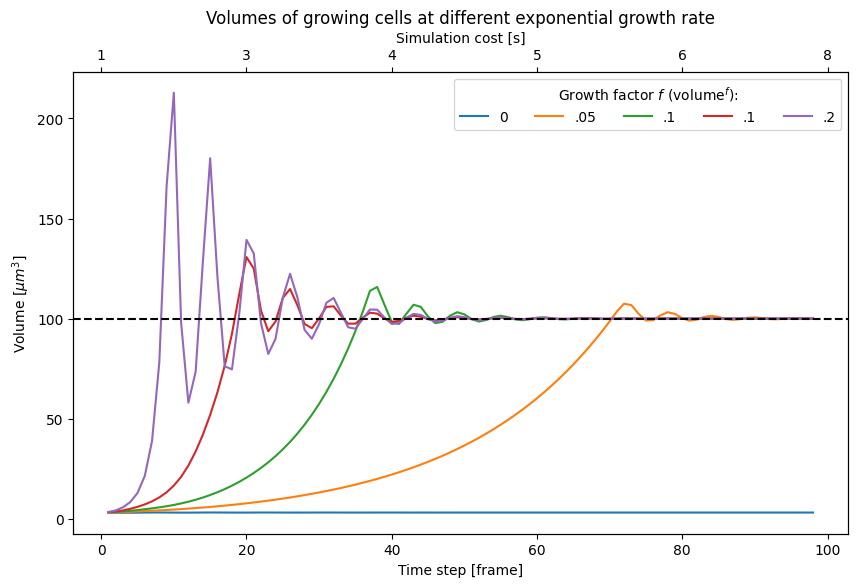

In [57]:
# PID controlled linear growth; single cell iterations

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1_PID_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1_PID_times.json", 'r') as f1:
    times1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1_PID_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1_PID_pressures.json", 'r') as f1:
    pressures1 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.05_PID_volumes.json", 'r') as f1:
    volumes1_05 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.05_PID_times.json", 'r') as f1:
    times1_05 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.05_PID_frame_cells.json", 'r') as f1:
    frames1_05 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.05_PID_pressures.json", 'r') as f1:
    pressures1_05 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.1_PID_volumes.json", 'r') as f1:
    volumes1_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.1_PID_times.json", 'r') as f1:
    times1_1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.1_PID_frame_cells.json", 'r') as f1:
    frames1_1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.1_PID_pressures.json", 'r') as f1:
    pressures1_1 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.2_PID_volumes.json", 'r') as f1:
    volumes1_2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.2_PID_times.json", 'r') as f1:
    times1_2 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.2_PID_frame_cells.json", 'r') as f1:
    frames1_2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.2_PID_pressures.json", 'r') as f1:
    pressures1_2 = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.5_PID_volumes.json", 'r') as f1:
    volumes1_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.5_PID_times.json", 'r') as f1:
    times1_5 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.5_PID_frame_cells.json", 'r') as f1:
    frames1_5 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240123_expgrowth_PID/20240123_expgrowth_target100_gf1.5_PID_pressures.json", 'r') as f1:
    pressures1_5 = json.load(f1)



# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twiny()  # Create a secondary x-axis

scaling_factors = ['0', '.05', '.1', 
                   '.2', '.5']

for cell_name, volumes in volumes1.items():
    frames = frames1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[0])

for cell_name, volumes in volumes1_05.items():
    frames = frames1_05[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[1])

for cell_name, volumes in volumes1_1.items():
    frames = frames1_1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[2])

for cell_name, volumes in volumes1_2.items():
    frames = frames1_2[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[2])

for cell_name, volumes in volumes1_5.items():
    frames = frames1_5[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, label=scaling_factors[3])


# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::15]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
#ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

# Add horizontal lines
ax1.axhline(y=100, color='black', linestyle='--')

ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title(r'Volumes of growing cells at different exponential growth rate')
ax1.legend(title=r'Growth factor $f$ (volume$^f$):', loc='upper right', ncol=5)  # Legend for the primary x-axis plot
# ax1.grid(True)

# Saving the plot
plt.savefig("20240123_exp_growth.png", transparent=False, dpi=500)

plt.show()


/opt/homebrew/anaconda3/envs/goo/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


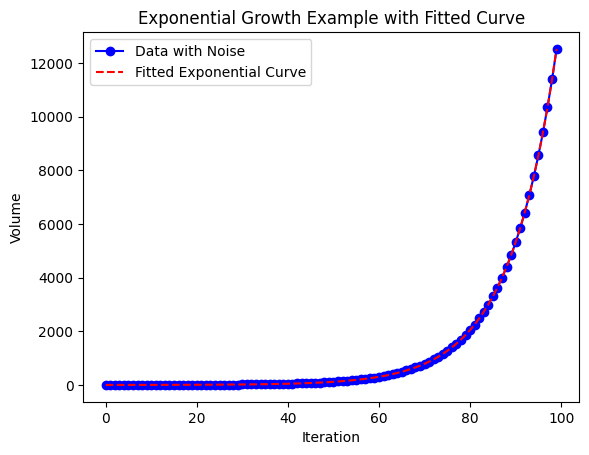

Fitted Growth Rate: 1.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Initial volume and growth rate
initial_volume = 1.0
growth_rate = 1.1

# Function to fit an exponential curve
def exponential_curve(x, a, b):
    return a * (growth_rate ** x)

# Lists to store volumes for plotting
iterations = list(range(100))
volumes = [initial_volume * (growth_rate ** i) for i in iterations]

# Adding some noise to the data for more realistic fitting
np.random.seed(42)
noisy_volumes = volumes + np.random.normal(0, 0.1, len(iterations))

# Fitting the exponential curve
params, covariance = curve_fit(exponential_curve, iterations, noisy_volumes)

# Plotting
plt.plot(iterations, noisy_volumes, marker='o', linestyle='-', color='b', label='Data with Noise')
plt.plot(iterations, exponential_curve(np.array(iterations), *params), 'r--', label='Fitted Exponential Curve')
plt.xlabel('Iteration')
plt.ylabel('Volume')
plt.title('Exponential Growth Example with Fitted Curve')
plt.legend()
plt.show()

# Display the fitted parameters (growth rate)
print(f"Fitted Growth Rate: {params[1]}")


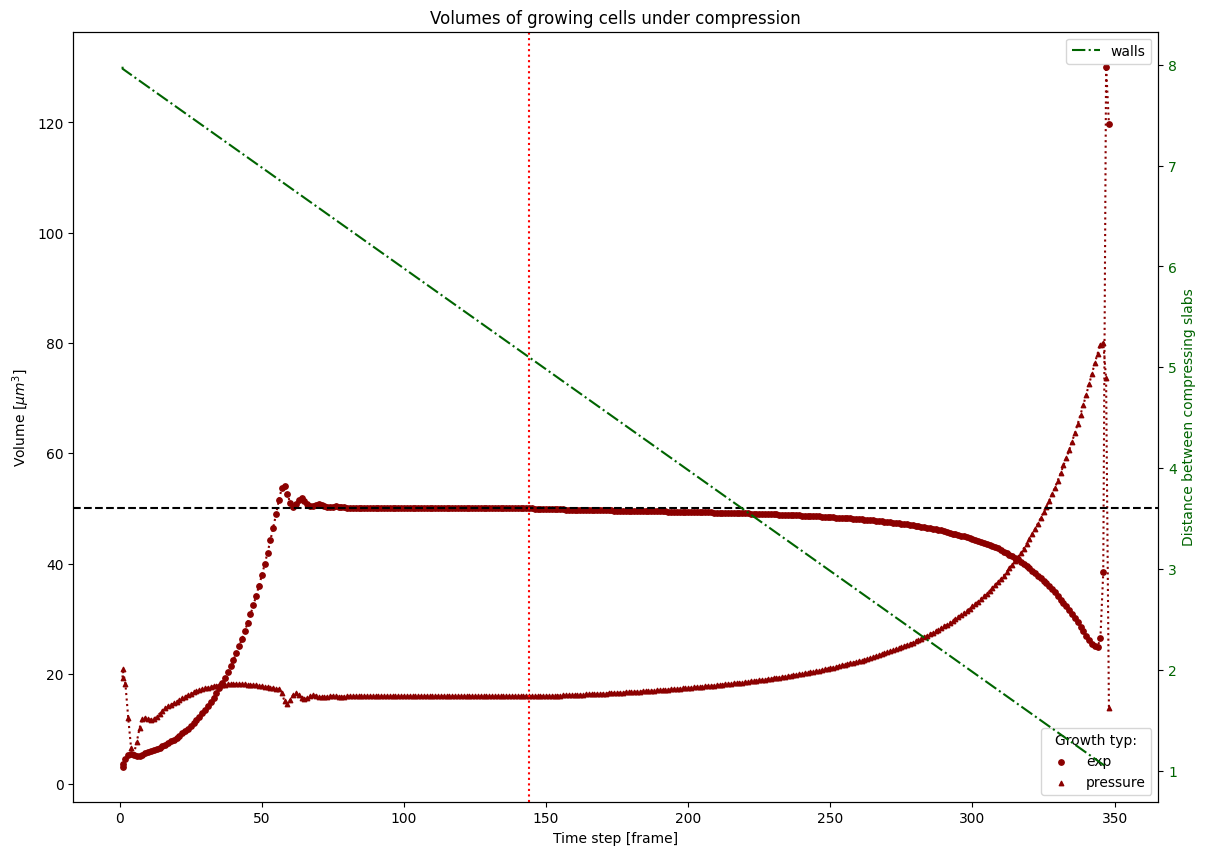

In [163]:
# PID controlled linear growth; single cell iterations

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_exponentialgrowth_target50_gf0.05_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_exponentialgrowth_target50_gf0.05_times.json", 'r') as f1:   
    times1 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_exponentialgrowth_target50_gf0.05_frame_cells.json", 'r') as f1:
    frames1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_exponentialgrowth_target50_gf0.05_pressures.json", 'r') as f1:
    pressures1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_exponentialgrowth_target50_gf0.05_distance_walls.json", 'r') as f1:
    walls = json.load(f1)

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_lineargrowth_target50_gf1_volumes.json", 'r') as f1:
    volumes2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_lineargrowth_target50_gf1_times.json", 'r') as f1:   
    times2 = json.load(f1)    
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_lineargrowth_target50_gf1_frame_cells.json", 'r') as f1:
    frames2 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_growth_wallcompression/20240130_lineargrowth_target50_gf1_pressures.json", 'r') as f1:
    pressures2 = json.load(f1)

# FPS (frames per second)
fps = 24

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 10))

scaling_factors = ['exp', 'linear']

for cell_name, volumes in volumes1.items():
    frames = frames1[cell_name]
    pressures = pressures1[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, linestyle=':', color='darkred')
    ax1.scatter(frames, volumes, color='darkred', marker='o', s=15, label=scaling_factors[0])
    ax1.plot(frames, pressures, linestyle=':', color='darkred')
    ax1.scatter(frames, pressures, color='darkred', marker='^', s=10, label='pressure')

'''for cell_name, volumes in volumes2.items():
    frames = frames2[cell_name]
    pressures = pressures2[cell_name]
    # Truncate frames if longer than volumes
    if len(frames) > len(volumes):
        frames = frames[:len(volumes)]

    ax1.plot(frames, volumes, linestyle=':', color='darkblue')
    ax1.scatter(frames, volumes, color='darkblue', marker='o', s=15, label=scaling_factors[1])
    ax1.plot(frames, pressures, linestyle=':', color='darkblue')
    ax1.scatter(frames, pressures, color='darkblue', marker='^', s=10, label='pressure')'''

# Add horizontal lines
ax1.axhline(y=50, color='black', linestyle='--')
ax1.axvline(x=144, color='red', linestyle=':')

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')

ax1.set_title(r'Volumes of growing cells under compression')
ax1.legend(title=r'Growth typ:', loc='lower right', ncol=1)  # Legend for the primary x-axis plot
# ax1.grid(True)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot walls data on the secondary y-axis
ax2.plot(frames[:-1], walls, color='darkgreen', linestyle='-.', label='walls')

# Set the y-axis label for the secondary y-axis
ax2.set_ylabel('Distance between compressing slabs', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.legend()
# Saving the plot
plt.savefig("20240123_growth_wall_compression.png", transparent=False, dpi=500)

plt.show()

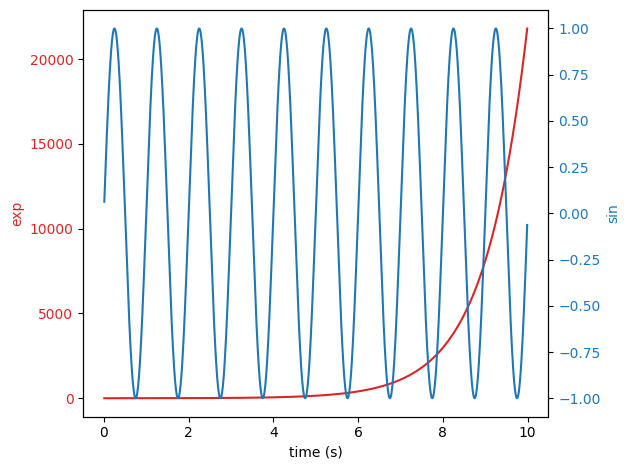

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_99912/2424496727.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


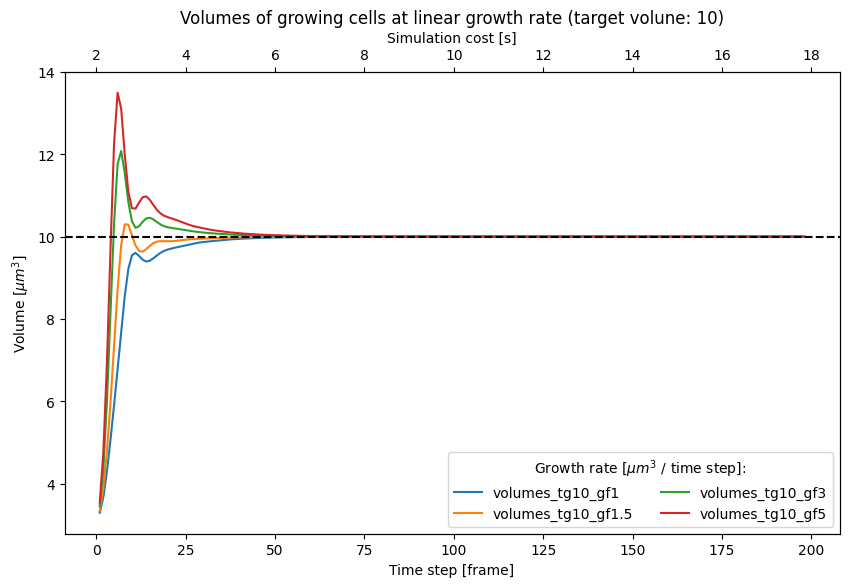

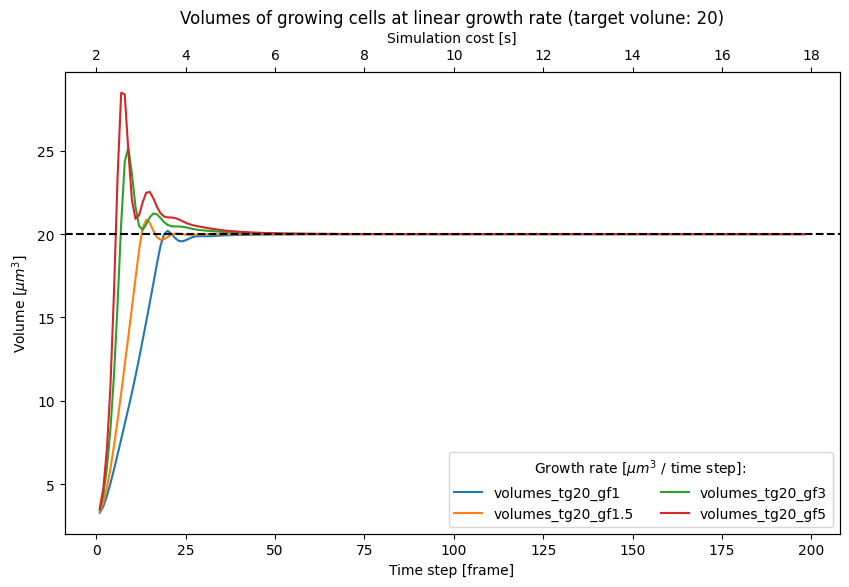

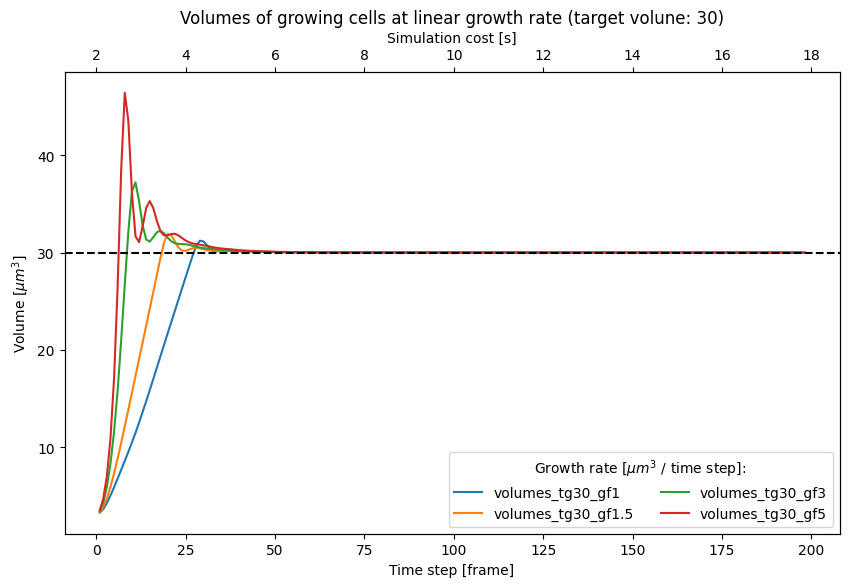

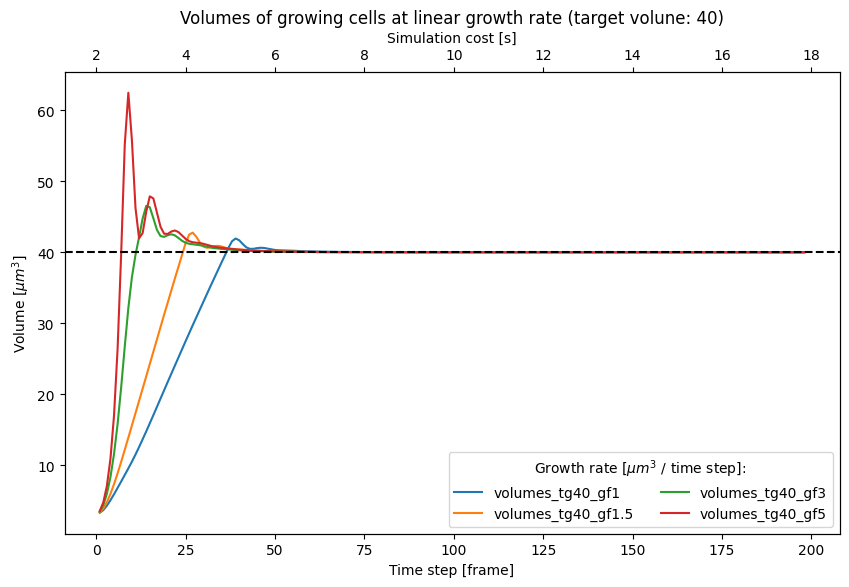

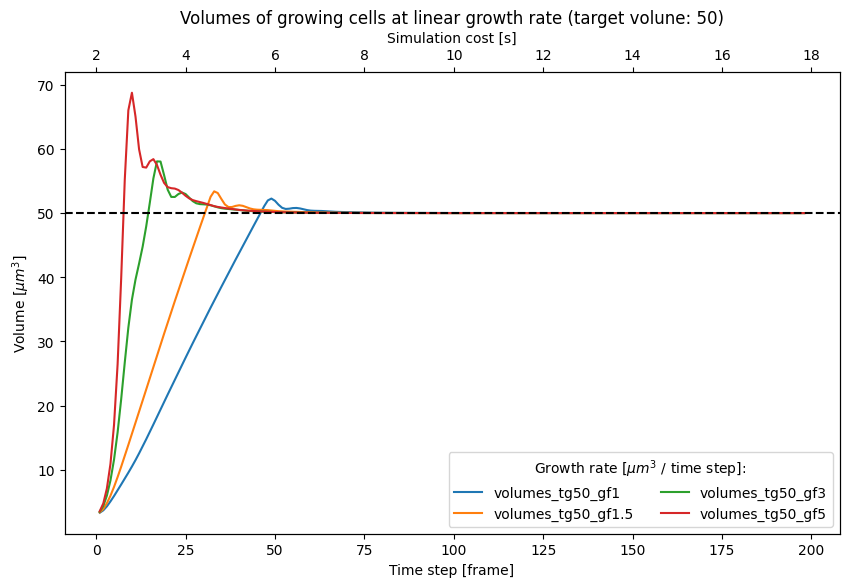

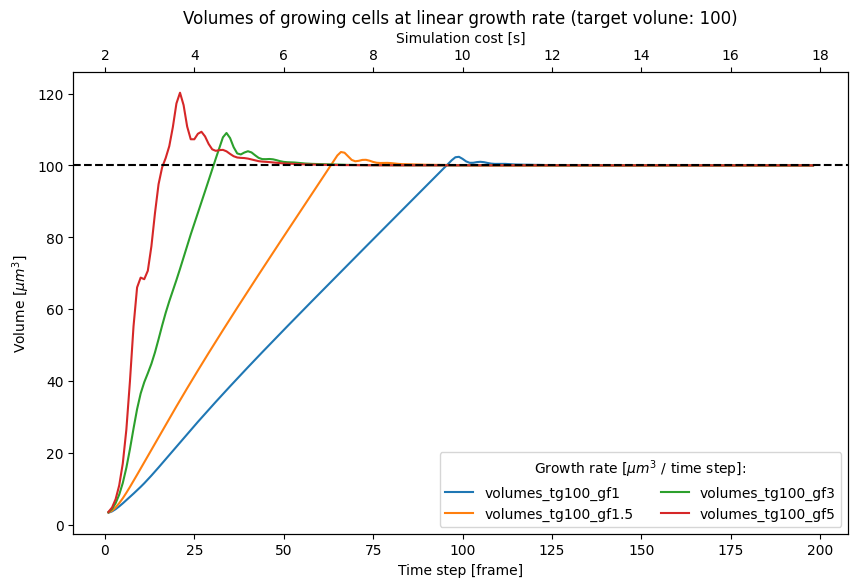

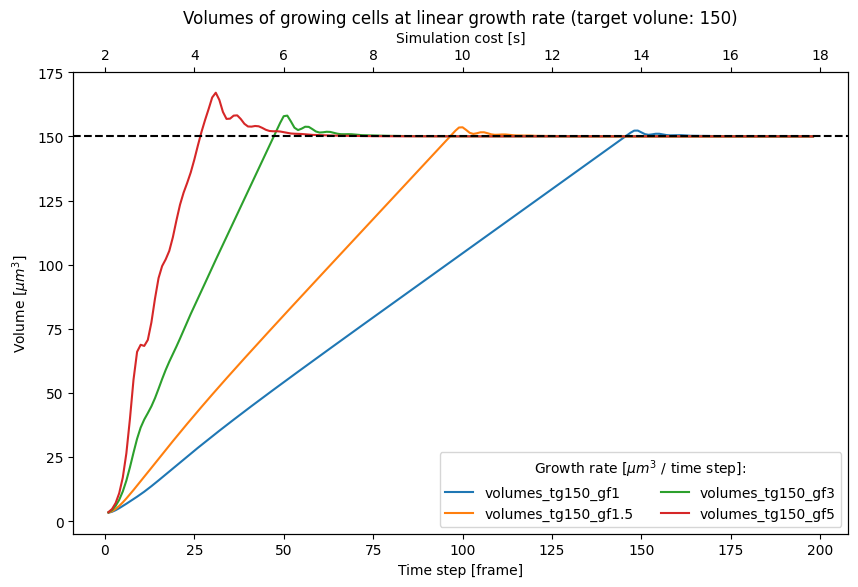

In [43]:
import json
import os
import matplotlib.pyplot as plt

folder_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_lineargrowth_benchmark/"

# Define target and gf values
targets = [10, 20, 30, 40, 50, 100, 150]
gfs = [1, 1.5, 3, 5]

# Generate combinations
combinations = [(target, gf) for target in targets for gf in gfs]
indiv_file_name = '20240129_lineargrowth_benchmark'

# Plotting
for target in targets:
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twiny()  # Create a secondary x-axis

    for gf in gfs:
        # Construct file paths
        volumes_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_volumes.json")
        times_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_times.json")
        frames_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_frame_cells.json")
        pressures_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_pressures.json")

        # Load JSON files and assign variables
        with open(volumes_path, 'r') as f:
            volumes = json.load(f)

        with open(times_path, 'r') as f:
            times = json.load(f)

        with open(frames_path, 'r') as f:
            frames = json.load(f)

        with open(pressures_path, 'r') as f:
            pressures = json.load(f)
            
        # Create variable names dynamically
        volumes_variable_name = f'volumes_tg{target}_gf{gf}'
        times_variable_name = f'times_tg{target}_gf{gf}'
        frames_variable_name = f'frames_tg{target}_gf{gf}'
        pressures_variable_name = f'pressures_tg{target}_gf{gf}'

        for cell_name, volumes in volumes.items():
            frames = frames[cell_name]
            # Truncate frames if longer than volumes
            if len(frames) > len(volumes):
                frames = frames[:len(volumes)]
            ax1.plot(frames, volumes, label=volumes_variable_name)

    # Plotting the secondary x-axis with the converted numerical data at regular intervals
    keys = list(times1.keys())[::15]  # Select keys at regular intervals
    values = [times1[key] for key in keys]  # Corresponding values

    ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
    # ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
    ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

    # Add horizontal lines
    ax1.axhline(y=target, color='black', linestyle='--')

    ax2.set_xlabel('simulation cost [s]')

    # Convert frame numbers to time in seconds
    # times = [sim_time for sim_time in frame_data]
    # ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

    ax1.set_xlabel('Time step [frame]')
    ax1.set_ylabel(r'Volume [$\mu m^3$]')
    ax2.set_xlabel(r'Simulation cost [s]')

    ax1.set_title(f'Volumes of growing cells at linear growth rate (target volune: {target})')
    ax1.legend(title=r'Growth rate [$\mu m^3$ / time step]:', loc='lower right', ncol=2)  # Legend for the primary x-axis plot
    # ax1.grid(True)

    # Saving the plot
    plt.savefig(f"20240123_linear_growth_tg{target}.png", transparent=False, dpi=500)

    plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_99912/2030276709.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


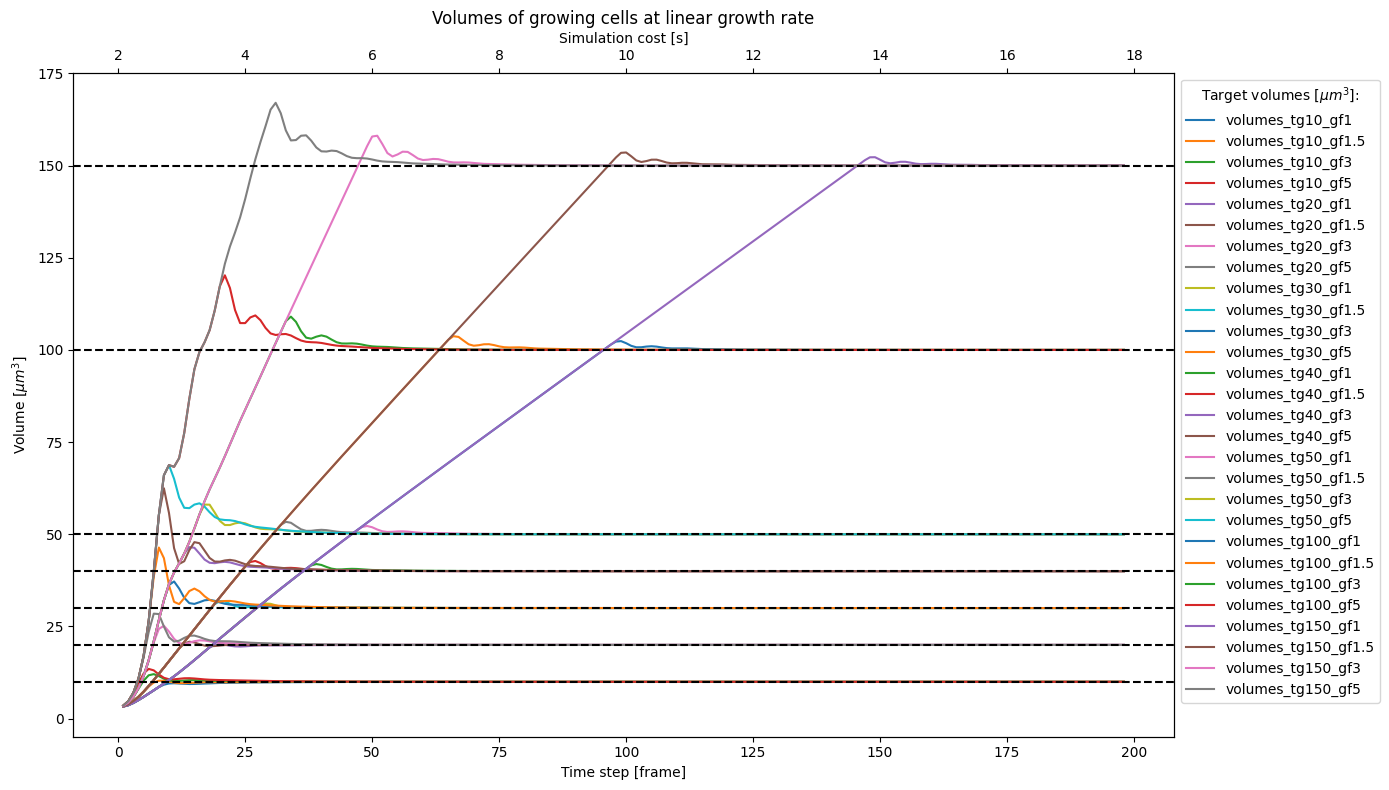

In [72]:
import json
import os
import matplotlib.pyplot as plt

folder_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240129_lineargrowth_benchmark/"

# Define target and gf values
targets = [10, 20, 30, 40, 50, 100, 150]
gfs = [1, 1.5, 3, 5]

# Generate combinations
combinations = [(target, gf) for target in targets for gf in gfs]
indiv_file_name = '20240129_lineargrowth_benchmark'

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twiny()  # Create a secondary x-axis

for target in targets:
    for gf in gfs:
        # Construct file paths
        volumes_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_volumes.json")
        times_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_times.json")
        frames_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_frame_cells.json")
        pressures_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_pressures.json")

        # Load JSON files and assign variables
        with open(volumes_path, 'r') as f:
            volumes = json.load(f)

        with open(times_path, 'r') as f:
            times = json.load(f)

        with open(frames_path, 'r') as f:
            frames = json.load(f)

        with open(pressures_path, 'r') as f:
            pressures = json.load(f)
            
        # Create variable names dynamically
        volumes_variable_name = f'volumes_tg{target}_gf{gf}'
        times_variable_name = f'times_tg{target}_gf{gf}'
        frames_variable_name = f'frames_tg{target}_gf{gf}'
        pressures_variable_name = f'pressures_tg{target}_gf{gf}'

        for cell_name, volumes in volumes.items():
            frames = frames[cell_name]
            # Truncate frames if longer than volumes
            if len(frames) > len(volumes):
                frames = frames[:len(volumes)]
            ax1.plot(frames, volumes, label=volumes_variable_name)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::15]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
# ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

# Add horizontal lines
for target in targets:
    ax1.axhline(y=target, color='black', linestyle='--')

ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title(f'Volumes of growing cells at linear growth rate')
# Legend outside the plot to the right
ax1.legend(title=r'Target volumes [$\mu m^3$]:', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
# ax1.grid(True)

# Saving the plot with tight layout
plt.tight_layout()
plt.savefig("20240123_linear_growth_all_targets.png", bbox_inches='tight', transparent=False, dpi=500)

plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_99912/3951474961.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


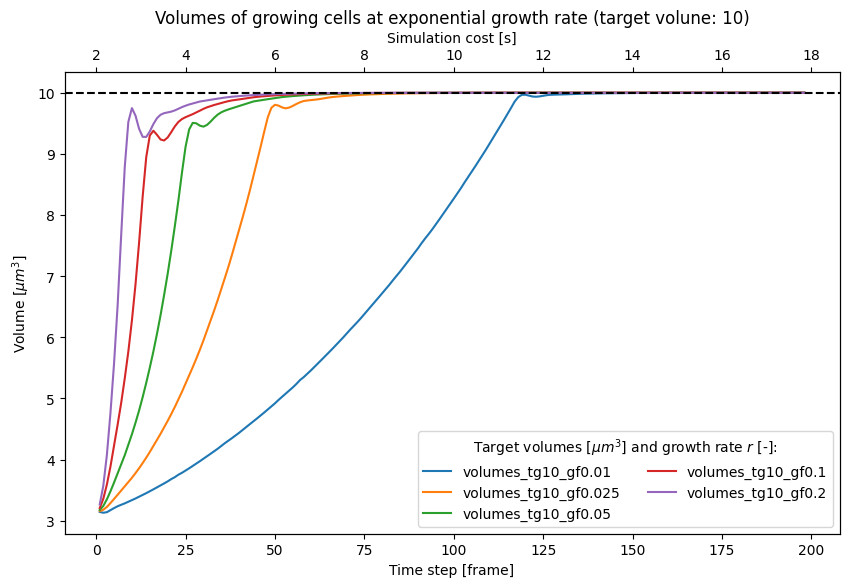

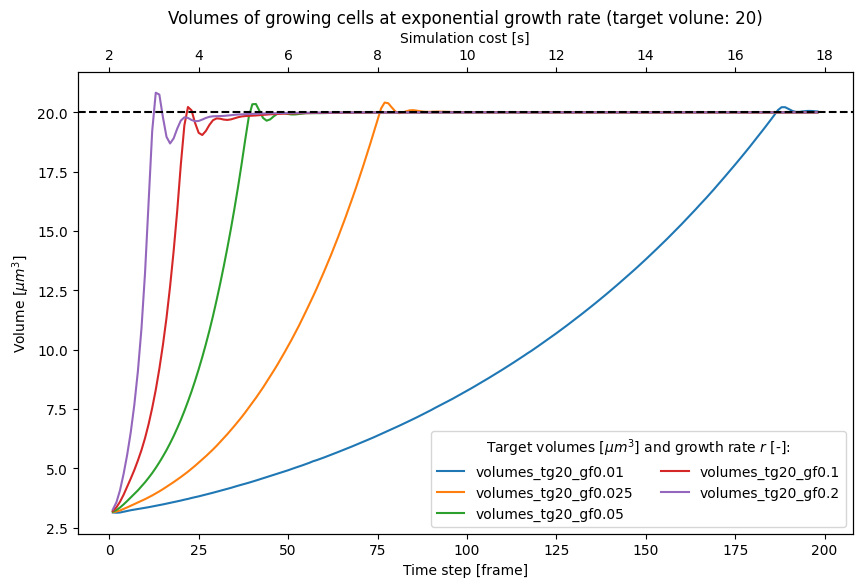

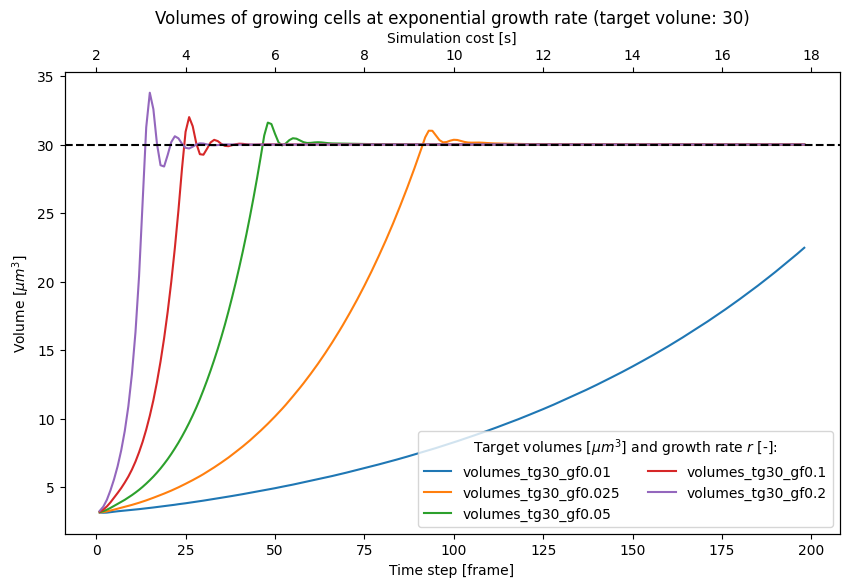

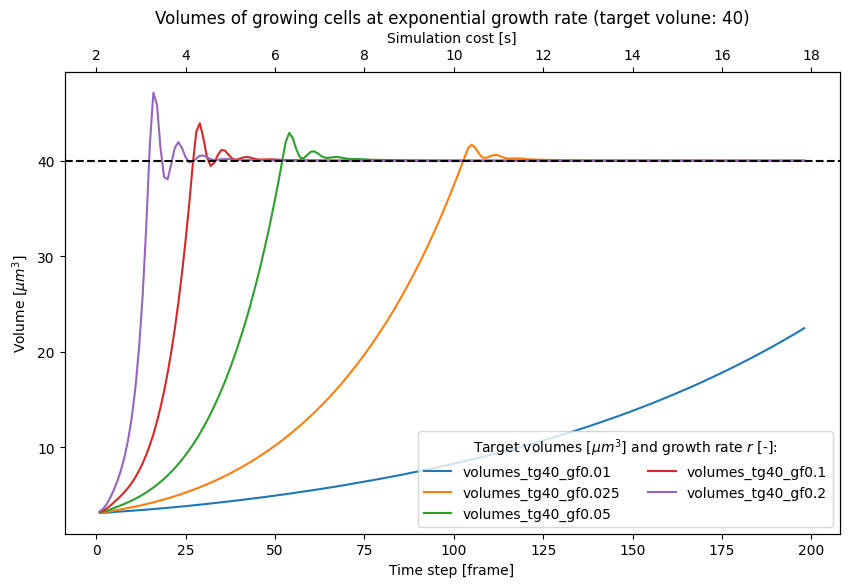

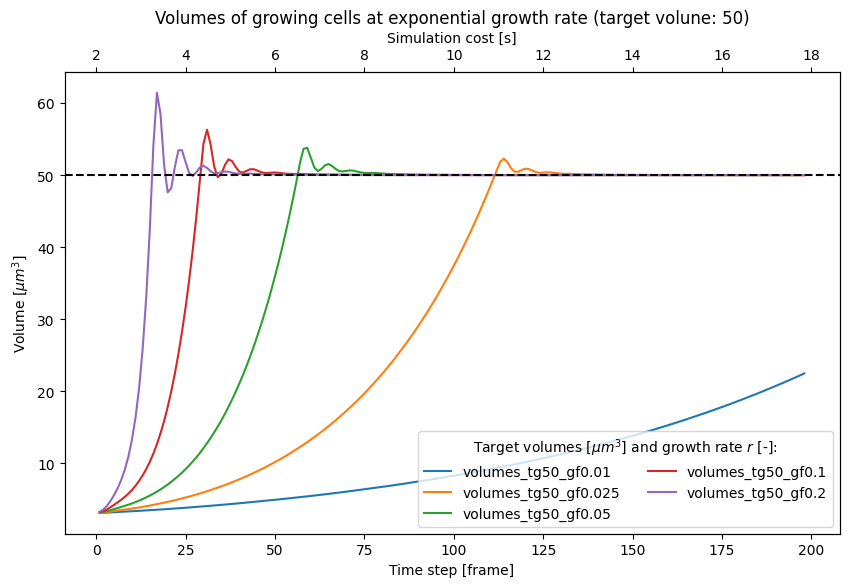

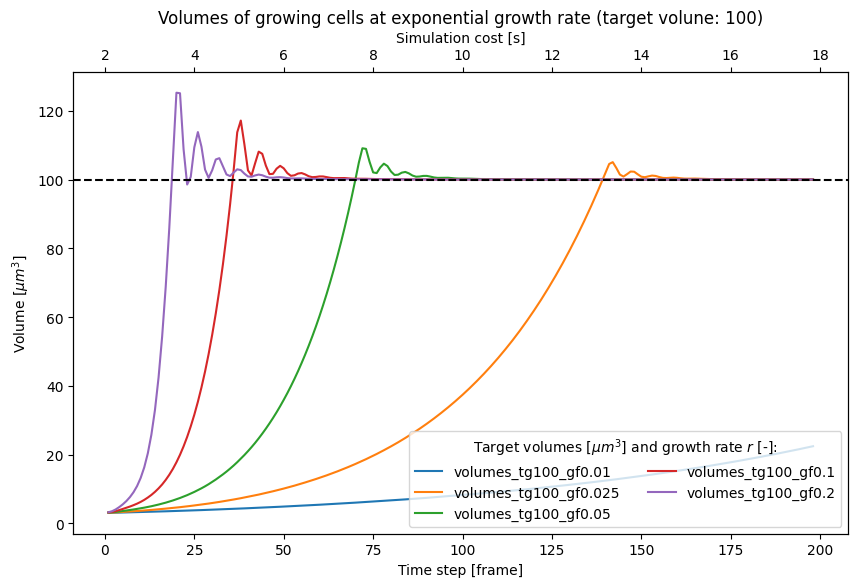

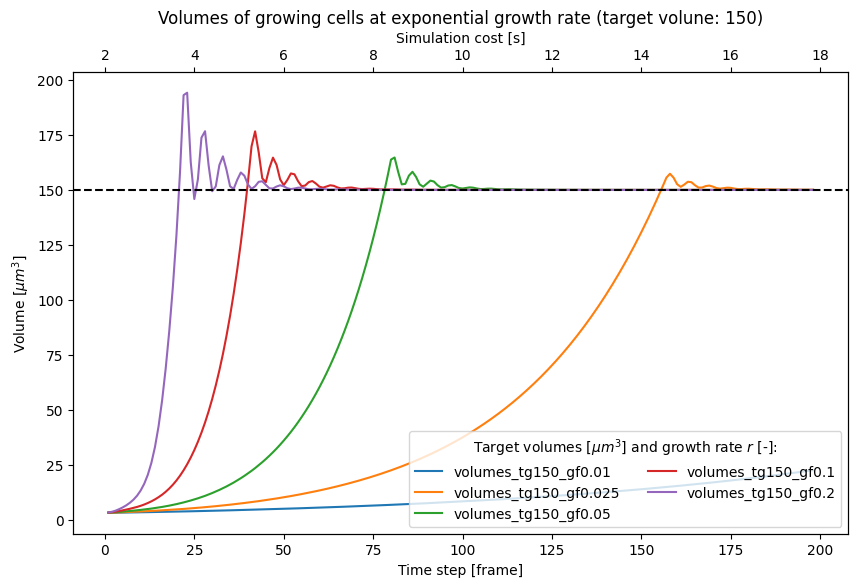

In [78]:
import json
import os
import matplotlib.pyplot as plt

folder_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240130_exponentialgrowth_benchmark/"

# Define target and gf values
targets = [10, 20, 30, 40, 50, 100, 150]
gfs = [0.01, 0.025, 0.05, 0.1, 0.2]

# Generate combinations
combinations = [(target, gf) for target in targets for gf in gfs]
indiv_file_name = '20240129_exponentialgrowth_benchmark'

# Plotting
for target in targets:
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twiny()  # Create a secondary x-axis

    for gf in gfs:
        # Construct file paths
        volumes_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_volumes.json")
        times_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_times.json")
        frames_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_frame_cells.json")
        pressures_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_pressures.json")

        # Load JSON files and assign variables
        with open(volumes_path, 'r') as f:
            volumes = json.load(f)

        with open(times_path, 'r') as f:
            times = json.load(f)

        with open(frames_path, 'r') as f:
            frames = json.load(f)

        with open(pressures_path, 'r') as f:
            pressures = json.load(f)
            
        # Create variable names dynamically
        volumes_variable_name = f'volumes_tg{target}_gf{gf}'
        times_variable_name = f'times_tg{target}_gf{gf}'
        frames_variable_name = f'frames_tg{target}_gf{gf}'
        pressures_variable_name = f'pressures_tg{target}_gf{gf}'

        for cell_name, volumes in volumes.items():
            frames = frames[cell_name]
            # Truncate frames if longer than volumes
            if len(frames) > len(volumes):
                frames = frames[:len(volumes)]
            ax1.plot(frames, volumes, label=volumes_variable_name)

    # Plotting the secondary x-axis with the converted numerical data at regular intervals
    keys = list(times1.keys())[::15]  # Select keys at regular intervals
    values = [times1[key] for key in keys]  # Corresponding values

    ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
    # ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
    ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

    # Add horizontal lines
    ax1.axhline(y=target, color='black', linestyle='--')

    ax2.set_xlabel('simulation cost [s]')

    # Convert frame numbers to time in seconds
    # times = [sim_time for sim_time in frame_data]
    # ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

    ax1.set_xlabel('Time step [frame]')
    ax1.set_ylabel(r'Volume [$\mu m^3$]')
    ax2.set_xlabel(r'Simulation cost [s]')

    ax1.set_title(f'Volumes of growing cells at exponential growth rate (target volune: {target})')
    ax1.legend(title=r'Target volumes [$\mu m^3$] and growth rate $r$ [-]:', loc='lower right', ncol=2)  # Legend for the primary x-axis plot
    # ax1.grid(True)

    # Saving the plot
    plt.savefig(f"20240123_exponential_growth_tg{target}.png", transparent=False, dpi=500)

    plt.show()


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_99912/4207997585.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


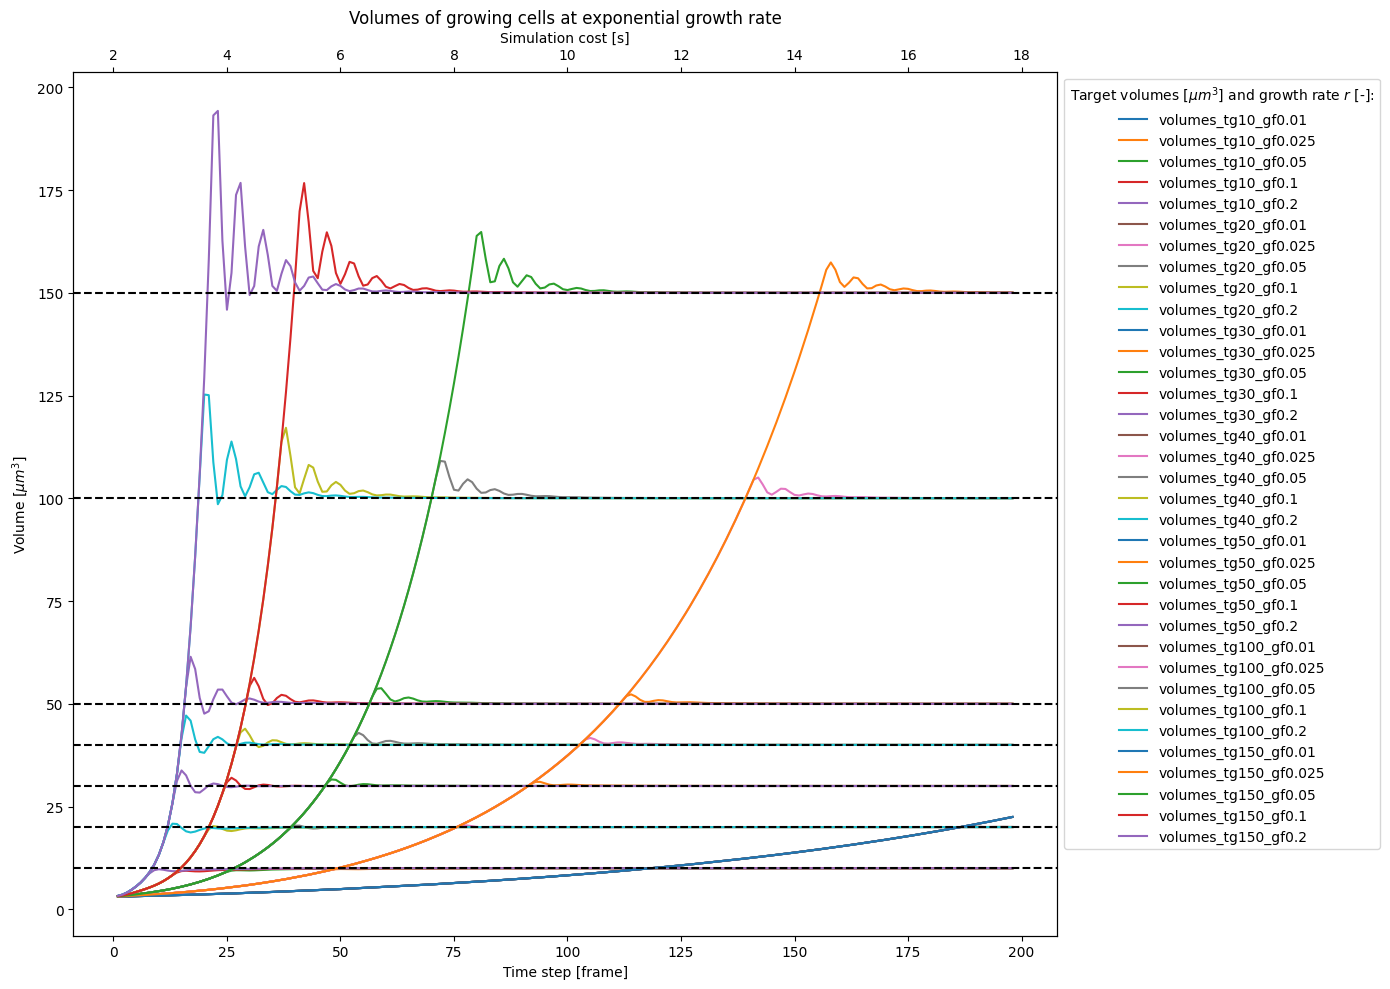

In [77]:
import json
import os
import matplotlib.pyplot as plt
folder_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240130_exponentialgrowth_benchmark/"

# Define target and gf values
targets = [10, 20, 30, 40, 50, 100, 150]
gfs = [0.01, 0.025, 0.05, 0.1, 0.2]

# Generate combinations
combinations = [(target, gf) for target in targets for gf in gfs]
indiv_file_name = '20240129_exponentialgrowth_benchmark'

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 10))
ax2 = ax1.twiny()  # Create a secondary x-axis

for target in targets:
    for gf in gfs:
        # Construct file paths
        volumes_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_volumes.json")
        times_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_times.json")
        frames_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_frame_cells.json")
        pressures_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_pressures.json")

        # Load JSON files and assign variables
        with open(volumes_path, 'r') as f:
            volumes = json.load(f)

        with open(times_path, 'r') as f:
            times = json.load(f)

        with open(frames_path, 'r') as f:
            frames = json.load(f)

        with open(pressures_path, 'r') as f:
            pressures = json.load(f)
            
        # Create variable names dynamically
        volumes_variable_name = f'volumes_tg{target}_gf{gf}'
        times_variable_name = f'times_tg{target}_gf{gf}'
        frames_variable_name = f'frames_tg{target}_gf{gf}'
        pressures_variable_name = f'pressures_tg{target}_gf{gf}'

        for cell_name, volumes in volumes.items():
            frames = frames[cell_name]
            # Truncate frames if longer than volumes
            if len(frames) > len(volumes):
                frames = frames[:len(volumes)]
            ax1.plot(frames, volumes, label=volumes_variable_name)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::15]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
# ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

# Add horizontal lines
for target in targets:
    ax1.axhline(y=target, color='black', linestyle='--')

ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title(f'Volumes of growing cells at exponential growth rate')
# Legend outside the plot to the right
ax1.legend(title=r'Target volumes [$\mu m^3$] and growth rate $r$ [-]:', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
# ax1.grid(True)

# Saving the plot with tight layout
plt.tight_layout()
plt.savefig("20240123_exponential_growth_all_targets.png", bbox_inches='tight', transparent=False, dpi=500)

plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_99912/1238245261.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


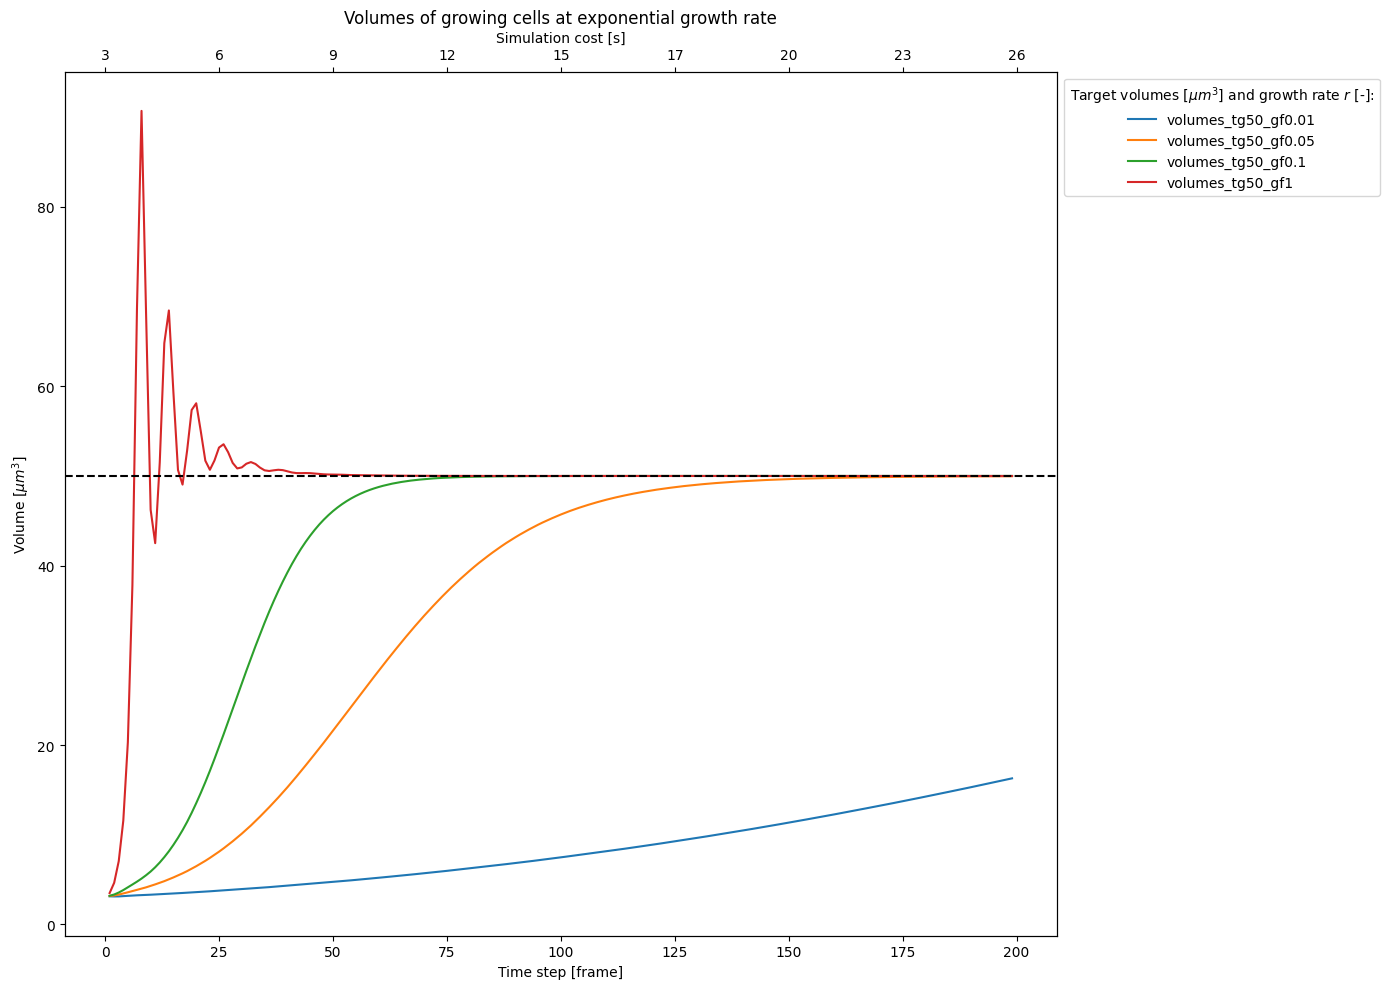

In [336]:
import json
import os
import matplotlib.pyplot as plt
folder_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240201_sigmoidgrowth_benchmark"

# Define target and gf values
targets = [50]
gfs = [0.01, 0.05, 0.1, 1]

# Generate combinations
combinations = [(target, gf) for target in targets for gf in gfs]
indiv_file_name = '20240201_sigmoidgrowth_benchmark'

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 10))
ax2 = ax1.twiny()  # Create a secondary x-axis

for target in targets:
    for gf in gfs:
        # Construct file paths
        volumes_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_volumes.json")
        times_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_times.json")
        frames_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_frame_cells.json")
        pressures_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_pressures.json")

        # Load JSON files and assign variables
        with open(volumes_path, 'r') as f:
            volumes = json.load(f)

        with open(times_path, 'r') as f:
            times = json.load(f)

        with open(frames_path, 'r') as f:
            frames = json.load(f)

        with open(pressures_path, 'r') as f:
            pressures = json.load(f)
            
        # Create variable names dynamically
        volumes_variable_name = f'volumes_tg{target}_gf{gf}'
        times_variable_name = f'times_tg{target}_gf{gf}'
        frames_variable_name = f'frames_tg{target}_gf{gf}'
        pressures_variable_name = f'pressures_tg{target}_gf{gf}'

        for cell_name, volumes in volumes.items():
            frames = frames[cell_name]
            # Truncate frames if longer than volumes
            if len(frames) > len(volumes):
                frames = frames[:len(volumes)]
            ax1.plot(frames, volumes, label=volumes_variable_name)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::15]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
# ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

# Add horizontal lines
for target in targets:
    ax1.axhline(y=target, color='black', linestyle='--')

ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title(f'Volumes of growing cells at exponential growth rate')
# Legend outside the plot to the right
ax1.legend(title=r'Target volumes [$\mu m^3$] and growth rate $r$ [-]:', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
# ax1.grid(True)

# Saving the plot with tight layout
plt.tight_layout()
plt.savefig("20240123_exponential_growth_all_targets.png", bbox_inches='tight', transparent=False, dpi=500)

plt.show()

/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_99912/84352702.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values


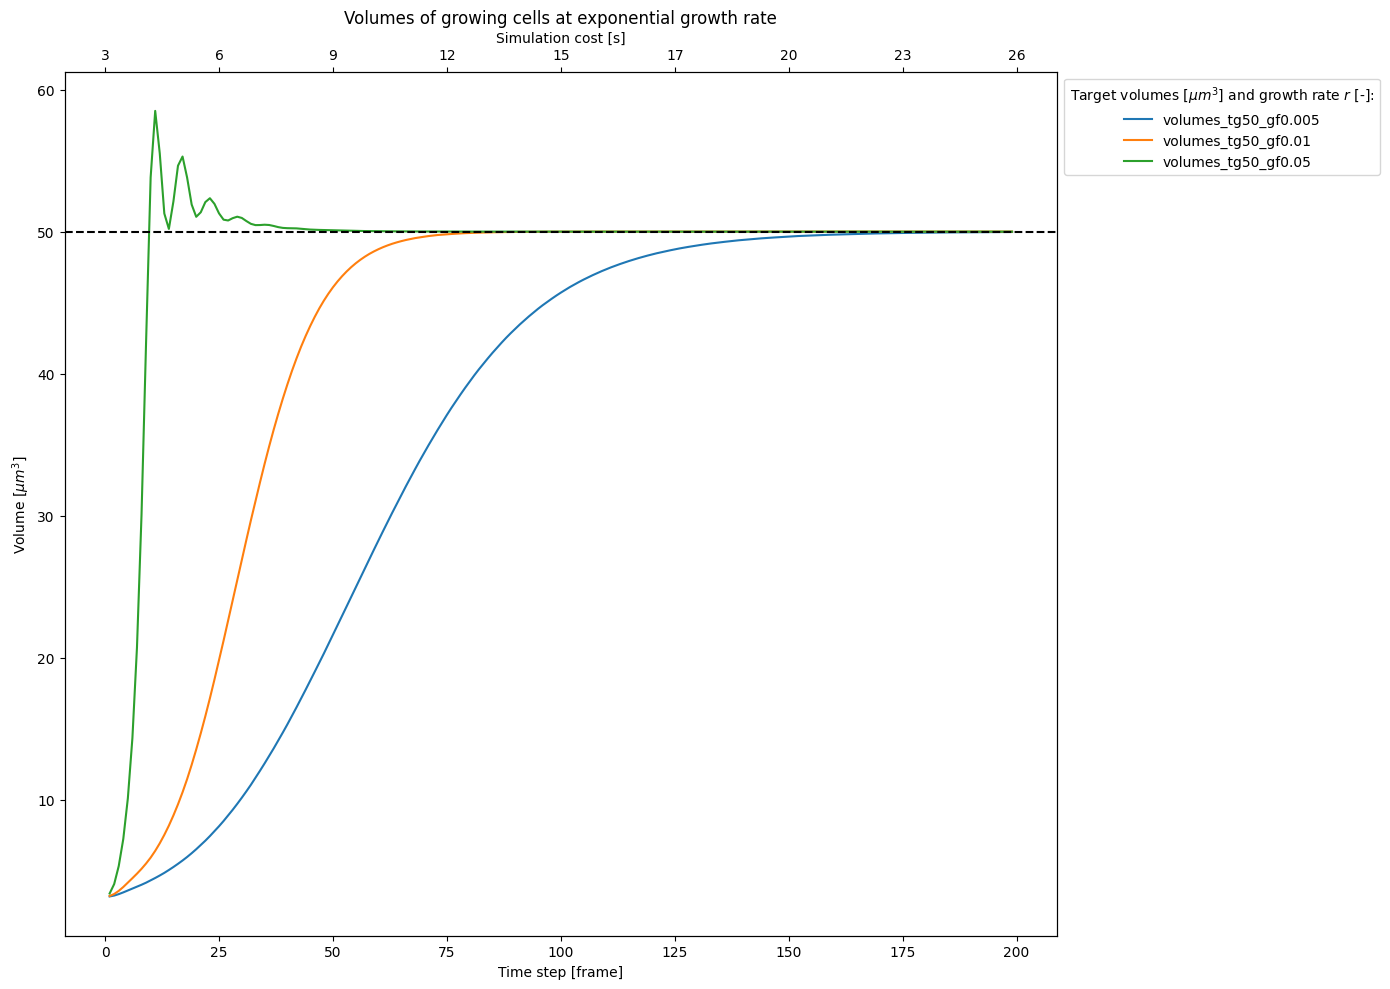

In [339]:
import json
import os
import matplotlib.pyplot as plt
folder_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/growth/20240201_sigmoidgrowth_benchmark_dt10"

# Define target and gf values
targets = [50]
gfs = [0.005, 0.01, 0.05]

# Generate combinations
combinations = [(target, gf) for target in targets for gf in gfs]
indiv_file_name = '20240201_sigmoidgrowth_benchmark'

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 10))
ax2 = ax1.twiny()  # Create a secondary x-axis

for target in targets:
    for gf in gfs:
        # Construct file paths
        volumes_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_volumes.json")
        times_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_times.json")
        frames_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_frame_cells.json")
        pressures_path = os.path.join(folder_path, f"{indiv_file_name}_target{target}_gf{gf}_pressures.json")

        # Load JSON files and assign variables
        with open(volumes_path, 'r') as f:
            volumes = json.load(f)

        with open(times_path, 'r') as f:
            times = json.load(f)

        with open(frames_path, 'r') as f:
            frames = json.load(f)

        with open(pressures_path, 'r') as f:
            pressures = json.load(f)
            
        # Create variable names dynamically
        volumes_variable_name = f'volumes_tg{target}_gf{gf}'
        times_variable_name = f'times_tg{target}_gf{gf}'
        frames_variable_name = f'frames_tg{target}_gf{gf}'
        pressures_variable_name = f'pressures_tg{target}_gf{gf}'

        for cell_name, volumes in volumes.items():
            frames = frames[cell_name]
            # Truncate frames if longer than volumes
            if len(frames) > len(volumes):
                frames = frames[:len(volumes)]
            ax1.plot(frames, volumes, label=volumes_variable_name)

# Plotting the secondary x-axis with the converted numerical data at regular intervals
keys = list(times1.keys())[::15]  # Select keys at regular intervals
values = [times1[key] for key in keys]  # Corresponding values

ax2.set_xlim(ax1.get_xlim())  # Set limits to match the primary x-axis
# ax2.set_xticks(map(int, keys))  # Set the ticks using the selected keys
ax2.set_xticklabels([f'{value:.0f}' for value in values])  # Set labels using the corresponding values

# Add horizontal lines
for target in targets:
    ax1.axhline(y=target, color='black', linestyle='--')

ax2.set_xlabel('simulation cost [s]')

# Convert frame numbers to time in seconds
# times = [sim_time for sim_time in frame_data]
# ax2.plot(times, alpha=0)  # Plotting on the secondary x-axis

ax1.set_xlabel('Time step [frame]')
ax1.set_ylabel(r'Volume [$\mu m^3$]')
ax2.set_xlabel(r'Simulation cost [s]')

ax1.set_title(f'Volumes of growing cells at exponential growth rate')
# Legend outside the plot to the right
ax1.legend(title=r'Target volumes [$\mu m^3$] and growth rate $r$ [-]:', loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
# ax1.grid(True)

# Saving the plot with tight layout
plt.tight_layout()
plt.savefig("20240123_exponential_growth_all_targets.png", bbox_inches='tight', transparent=False, dpi=500)

plt.show()

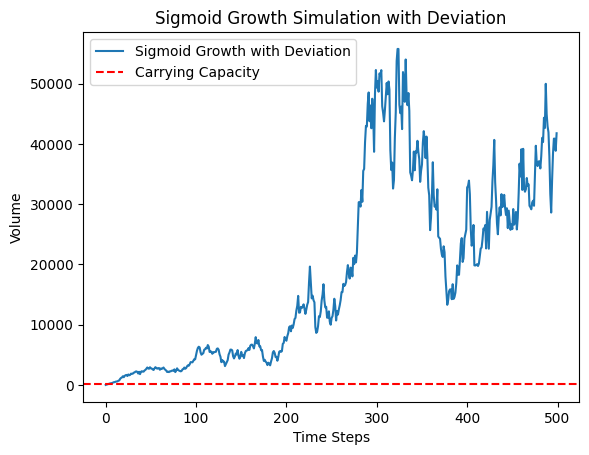

In [235]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t, growth_rate, carrying_capacity):
    return carrying_capacity / (1 + np.exp(-growth_rate * t))

def simulate_sigmoid_growth(initial_volume, growth_rate, carrying_capacity, num_steps, deviation_factor=0.1):
    volumes = [initial_volume]
    for t in range(1, num_steps):
        deviation = np.random.normal(0, 1) * deviation_factor * (carrying_capacity - volumes[-1])
        current_volume = volumes[-1] + deviation + sigmoid(t, growth_rate, carrying_capacity)
        volumes.append(current_volume)
    return volumes

# Parameters
initial_volume = 1  # Initial volume
growth_rate = 0.01  # Growth rate parameter
carrying_capacity = 100  # Carrying capacity (maximum volume)
num_steps = 500  # Number of simulation steps

# Simulate sigmoid growth with deviation
volume_values = simulate_sigmoid_growth(initial_volume, growth_rate, carrying_capacity, num_steps)

# Plotting the results
plt.plot(range(num_steps), volume_values, label='Sigmoid Growth with Deviation')
plt.axhline(y=carrying_capacity, color='r', linestyle='--', label='Carrying Capacity')
plt.xlabel('Time Steps')
plt.ylabel('Volume')
plt.title('Sigmoid Growth Simulation with Deviation')
plt.legend()
plt.show()


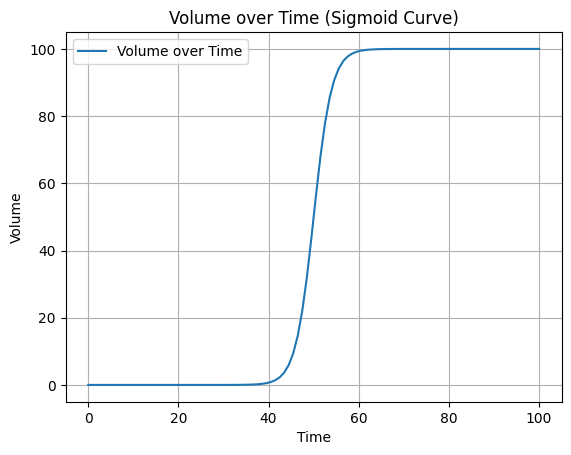

In [254]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, scale=1, inflection_point=0):
    return 1 / (1 + np.exp(-scale * (x - inflection_point)))

# Generate time values
time_values = np.linspace(0, 100, 100)

# Adjust the scale parameter to control the growth rate
# A smaller scale value will result in a slower growth
volume_values = 100 * sigmoid(time_values, scale=0.5, inflection_point=50)

# Plot the sigmoid curve representing volume over time
plt.plot(time_values, volume_values, label='Volume over Time')
plt.title('Volume over Time (Sigmoid Curve)')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


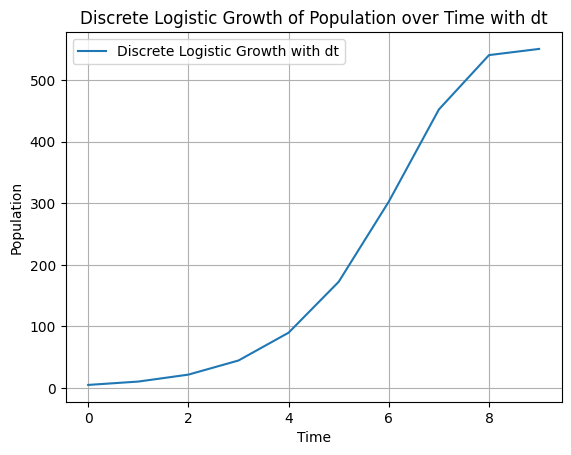

In [307]:
import numpy as np
import matplotlib.pyplot as plt

def discrete_logistic_growth_with_dt(previous_population, r, K, dt):
    # Calculate population size in the next generation with time step dt
    new_population = (1 + r * (1 - previous_population / K)) * previous_population * dt + previous_population
    return new_population

# Set parameters for the discrete logistic growth
r = 0.1  # Growth rate
K = 50  # Carrying capacity
dt = 1  # Time step

# Initialize population at time 0
initial_population = 5

# Number of time steps
num_steps = 10

# Store population values at each time step
population_values = [initial_population]

# Update population at each time step
for t in range(1, num_steps):
    updated_population = discrete_logistic_growth_with_dt(population_values[-1], r, K, dt)
    population_values.append(updated_population)

# Generate time values
time_values = np.arange(0, num_steps * dt, dt)

# Plot the discrete logistic growth curve representing population over time with dt
plt.plot(time_values, population_values, label='Discrete Logistic Growth with dt')
plt.title('Discrete Logistic Growth of Population over Time with dt')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


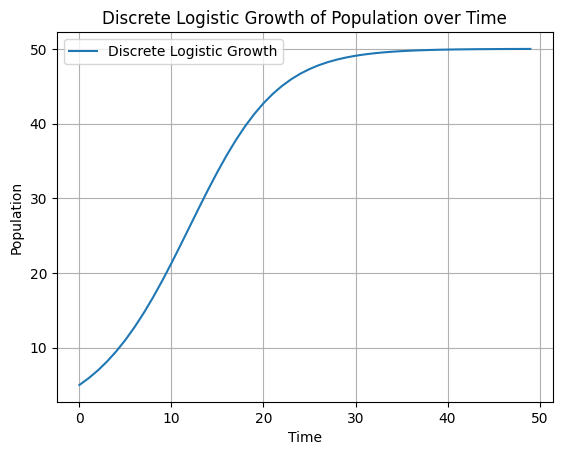

In [314]:
import numpy as np
import matplotlib.pyplot as plt

def discrete_logistic_growth(previous_population, r, K):
    # Calculate population size in the next generation
    new_population = (1 + r * (1 - previous_population / K)) * previous_population
    return new_population

# Set parameters for the discrete logistic growth
r = 0.2  # Growth rate
K = 50  # Carrying capacity

# Initialize population at time 0
initial_population = 5

# Number of time steps
num_steps = 50

# Store population values at each time step
population_values = [initial_population]

# Update population at each time step
for t in range(1, num_steps):
    updated_population = discrete_logistic_growth(population_values[-1], r, K)
    population_values.append(updated_population)

# Generate time values
time_values = np.arange(num_steps)

# Plot the discrete logistic growth curve representing population over time
plt.plot(time_values, population_values, label='Discrete Logistic Growth')
plt.title('Discrete Logistic Growth of Population over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


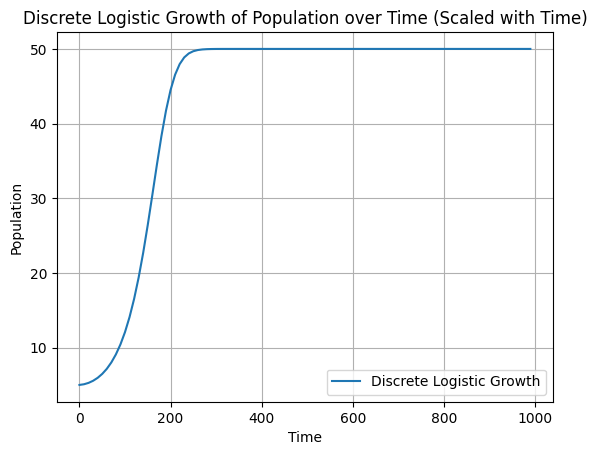

In [331]:
import numpy as np
import matplotlib.pyplot as plt

def discrete_logistic_growth(previous_population, r, K, dt):
    # Calculate population size in the next generation with time step dt
    new_population = (1 + r * (1 - previous_population / K) * dt) * previous_population
    return new_population

# Set parameters for the discrete logistic growth
initial_population = 5
r = 0.2  # Initial growth rate
K = 50  # Carrying capacity

# Time-related parameters
dt = 10  # Time step
num_steps = 100  # Number of time steps

# Store population values at each time step
population_values = [initial_population]

# Update population at each time step
for t in range(1, num_steps):
    updated_population = discrete_logistic_growth(population_values[-1], r * t/100, K, dt)
    population_values.append(updated_population)

# Generate time values
time_values = np.arange(num_steps) * dt

# Plot the discrete logistic growth curve representing population over time
plt.plot(time_values, population_values, label='Discrete Logistic Growth')
plt.title('Discrete Logistic Growth of Population over Time (Scaled with Time)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()
